# Example. Usage of Bohman's Methods

Let's look, how Bohman's method produce 

In [1]:
import cfinversion
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from cfinversion.continuous import *
def BohmanMethodTest(x, cf, ax = None, methods = ['A', 'B', 'C', 'D', 'E'], N = 1000, delta=1e-1):
  bohman = {
            'A' : BohmanA(N=N,delta=delta),
            'B' : BohmanB(N=N,delta=delta),
            'C' : BohmanC(N=N,delta=delta),
            'D' : BohmanD(N=N,delta=delta), 
            'E' : BohmanE(N=N,delta=delta)
    
            }
  
  for method in methods:
    bohman[method].fit(cf)
    ax.plot(x, bohman[method].cdf(x), label = f"Method {method}")
  return ax, bohman

In [10]:
def FitMethods(cf, N = 10000, delta=1e-1, trunc = 10):
  methods = {
            'Bohman A' : BohmanA(N=N,delta=delta),
            'Bohman B' : BohmanB(N=N,delta=delta),
            'Bohman C' : BohmanC(N=N,delta=delta),
            'Bohman D' : BohmanD(N=N,delta=delta), 
            'Bohman E' : BohmanE(N=N,delta=delta, K = 16),
            'Witkovsky GP'  : NaiveGPInverter(N=N,delta=delta),
            'Witkovsky FFT' : FFTInverter(N=N, A = -trunc, B = trunc)
            }
  
  for method in methods:
    methods[method].fit(cf)
  return methods

In [11]:
from cfinversion.distributions import Uniform, UniformSquared, Norm

## Smooth densities
1. Normal distribution
2. Laplace distribution
3. Cauchy distribution

## Distributions with discontinuous and singular densities
1. Uniform distribution
2. Uniform squared-distribution

In [12]:
#a = np.sqrt(15 / 7)
dist = Norm(0, 1)

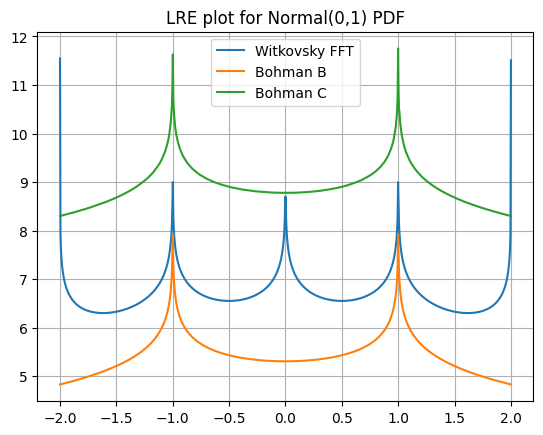

In [38]:
methods = FitMethods(dist.chr)
x = np.linspace(-2, 2, 1000)
plt.plot(x, lre(methods['Witkovsky FFT'].pdf(x), dist.pdf(x)), label = 'Witkovsky FFT')
plt.plot(x, lre(methods['Bohman B'].pdf(x), dist.pdf(x)), label = 'Bohman B')
plt.plot(x, lre(methods['Bohman C'].pdf(x), dist.pdf(x)), label = 'Bohman C')
plt.legend()
plt.title('LRE plot for Normal(0,1) PDF')
plt.grid()
plt.savefig('extra_lre_normal_pdf.png')

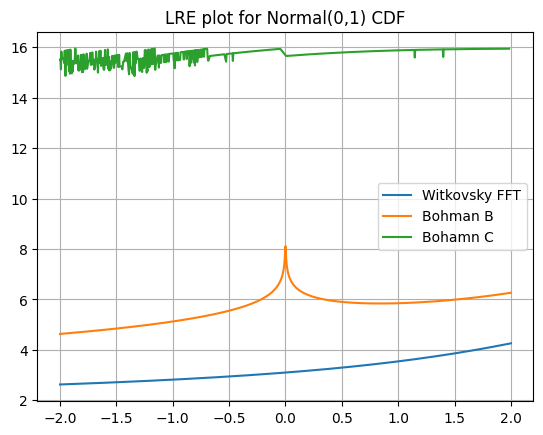

In [37]:
methods = FitMethods(dist.chr)
x = np.linspace(-2, 2, 1000)
get_mask = lambda m: m.cdf(x) != dist.cdf(x)

mask = get_mask(methods['Witkovsky FFT'])
plt.plot(x[mask], lre(methods['Witkovsky FFT'].cdf(x[mask]), dist.cdf(x[mask])), label = 'Witkovsky FFT')
mask = get_mask(methods['Bohman B'])
plt.plot(x[mask], lre(methods['Bohman B'].cdf(x[mask]), dist.cdf(x[mask])), label = 'Bohman B')
mask = get_mask(methods['Bohman C'])
plt.plot(x[mask], lre(methods['Bohman C'].cdf(x[mask]), dist.cdf(x[mask])), label  = 'Bohamn C')
plt.legend()
plt.title('LRE plot for Normal(0,1) CDF')
plt.grid()
plt.savefig('extra_lre_normal_cdf.png')

In [12]:
a = 2
dist = Uniform(-a/2 + 1, a/2 + 1)

In [5]:
from cfinversion.tools import lre

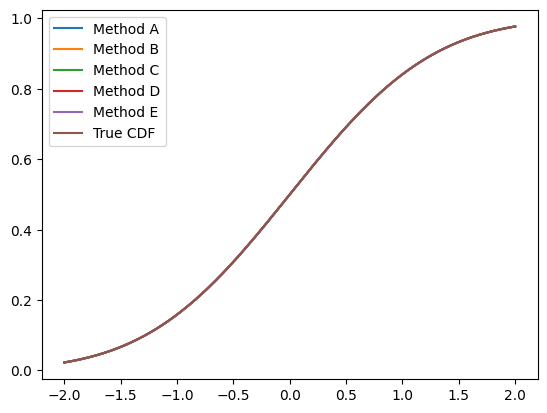

In [7]:
fig, ax = plt.subplots()
x = np.linspace(-2, 2, 1000)
ax, res = BohmanMethodTest(x, dist.chr, ax)
ax.plot(x, dist.cdf(x), label = "True CDF")
ax.legend()

# Bonus: discrete case

In [19]:
import scipy as sc
cf_ = lambda t: np.exp(10*(np.exp(1j*t) - 1))
cf = np.vectorize(cf_)
cdf_ = lambda x: 0.5 -\
  sc.integrate.quad(lambda t: np.real(cf(t)*np.exp(-1j*t*x) / (2 * np.pi * (1 - np.exp(-1j*t)))), -np.pi, np.pi, points = [0.0], epsabs = 0.0001)[0]
cdf = np.vectorize(cdf_)

In [23]:
x = np.linspace(-5, 20, 1001)
y = cdf(x)

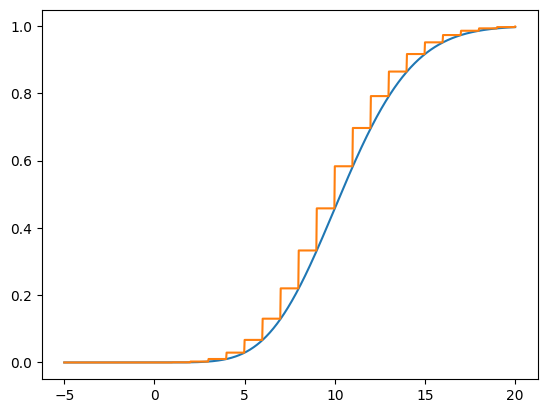

In [24]:
plt.plot(x, y)
plt.plot(x, sc.stats.poisson.cdf(x, mu = 10))

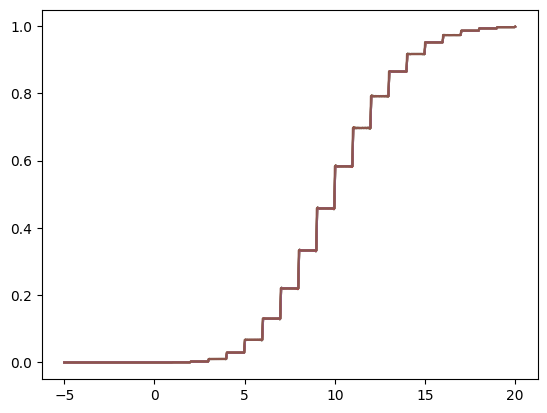

In [25]:
fig, ax = plt.subplots()
BohmanMethodTest(x, cf, ax, N = 10000)
ax.plot(x, sc.stats.poisson.cdf(x, mu = 10))